In [0]:
# Silent deprecation warnings
import warnings
warnings.filterwarnings('ignore')

# Silent tensor flow warning related to version 2 https://www.tensorflow.org/guide/migrate (below two lines are not working)
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

# if your keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

# Explicilty set log level to error i.e. supress info and warnings from TF
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

# Silent tensor flow warning related to version 2 https://www.tensorflow.org/guide/migrate (below two lines are not working)
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

In [3]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

<h1> Assignment CNN on MNIST </h1>

MNIST with 3 different ConvNets Architecture

* M1: 3X3
* M2: 5X5
* M3: 7X7

Include following features as well:

* Flatten
* Dense
* Dropout
* Maxpooling
* Batch Normalization

In [0]:
# 2 ConvNet layers of kernel size (3,3) with AdaDelta optimizer without BN
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 171s 3ms/step - loss: 0.2839 - acc: 0.9135 - val_loss: 0.0696 - val_acc: 0.9775
Epoch 2/12
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0927 - acc: 0.9725 - val_loss: 0.0423 - val_acc: 0.9858
Epoch 3/12
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0701 - acc: 0.9795 - val_loss: 0.0355 - val_acc: 0.9881
Epoch 4/12
60000/60000 [==============================] - 173s 3ms/step - loss: 0.0579 - acc: 0.9826 - val_loss: 0.0315 - val_acc: 0.9891
Epoch 5/12
60000/60000 [==============================] - 173s 3ms/step - loss: 0.0510 - acc: 0.9847 - val_loss: 0.0367 - val_acc: 0.9879
Epoch 6/12
60000/60000 [============

Test loss: 0.02989680919691109
Test accuracy: 0.9917


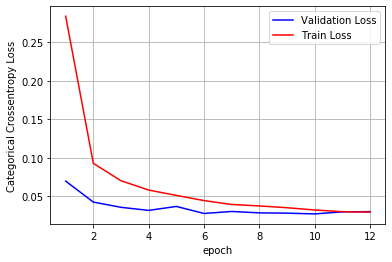

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
# 2 ConvNet layers of kernel size (3,3) with adam optimizer without BN

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.2643 - acc: 0.9181 - val_loss: 0.0598 - val_acc: 0.9809
Epoch 2/12
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0865 - acc: 0.9735 - val_loss: 0.0425 - val_acc: 0.9853
Epoch 3/12
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0641 - acc: 0.9810 - val_loss: 0.0351 - val_acc: 0.9885
Epoch 4/12
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0537 - acc: 0.9847 - val_loss: 0.0353 - val_acc: 0.9881
Epoch 5/12
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0473 - acc: 0.9861 - val_loss: 0.0280 - val_acc: 0.9905
Epoch 6/12
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0405 - acc: 0.9879 - val_loss: 0.0326 - val_acc: 0.9897
Epoch 7/12
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0366 - acc: 0.9884 - val_loss: 0.0276 - 

Test loss: 0.0264959564788458
Test accuracy: 0.9916


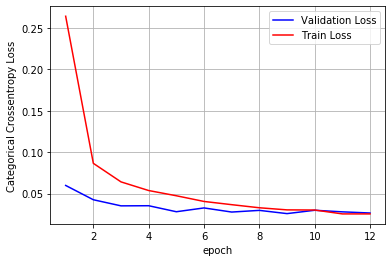

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
# 2 ConvNet layers of kernel size (3,3) with AdaDelta optimizer with BN

from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 181s 3ms/step - loss: 0.1574 - acc: 0.9532 - val_loss: 0.0447 - val_acc: 0.9843
Epoch 2/12
60000/60000 [==============================] - 181s 3ms/step - loss: 0.0630 - acc: 0.9811 - val_loss: 0.0523 - val_acc: 0.9833
Epoch 3/12
60000/60000 [==============================] - 182s 3ms/step - loss: 0.0449 - acc: 0.9865 - val_loss: 0.0335 - val_acc: 0.9897
Epoch 4/12
60000/60000 [==============================] - 185s 3ms/step - loss: 0.0362 - acc: 0.9886 - val_loss: 0.0371 - val_acc: 0.9883
Epoch 5/12
60000/60000 [==============================] - 185s 3ms/step - loss: 0.0316 - acc: 0.9902 - val_loss: 0.0321 - val_acc: 0.9888
Epoch 6/12
60000/60000 [==============================] - 183s 3ms/step - loss: 0.0257 - acc: 0.9922 - val_loss: 0.0373 - val_acc: 0.9895
Epoch 7/12
60000/60000 [==============================] - 182s 3ms/step - loss: 0.0222 - acc: 0.9931 - val_loss: 0.0333 -

Test loss: 0.03097261716249959
Test accuracy: 0.9916


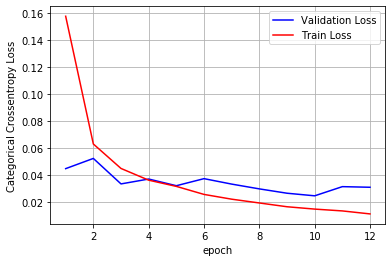

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
# 2 ConvNet layers of kernel size (3,3) with adam optimizer with BN

from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 184s 3ms/step - loss: 0.1637 - acc: 0.9516 - val_loss: 0.0555 - val_acc: 0.9822
Epoch 2/12
60000/60000 [==============================] - 181s 3ms/step - loss: 0.0633 - acc: 0.9813 - val_loss: 0.0352 - val_acc: 0.9878
Epoch 3/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0455 - acc: 0.9863 - val_loss: 0.0300 - val_acc: 0.9901
Epoch 4/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0372 - acc: 0.9886 - val_loss: 0.0311 - val_acc: 0.9911
Epoch 5/12
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0319 - acc: 0.9900 - val_loss: 0.0317 - val_acc: 0.9891
Epoch 6/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0289 - acc: 0.9908 - val_loss: 0.0262 - val_acc: 0.9914
Epoch 7/12
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0235 - acc: 0.9929 - val_loss: 0.0278 - 

Test loss: 0.03166750481659692
Test accuracy: 0.9915


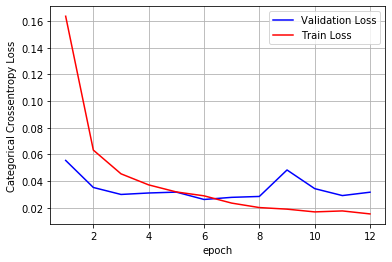

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
# 2 ConvNet layers of kernel size (3,3) with adam optimizer with BN with strides = (2,2)

from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.1656 - acc: 0.9518 - val_loss: 0.0494 - val_acc: 0.9826
Epoch 2/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0625 - acc: 0.9814 - val_loss: 0.0562 - val_acc: 0.9820
Epoch 3/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0461 - acc: 0.9863 - val_loss: 0.0590 - val_acc: 0.9797
Epoch 4/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0367 - acc: 0.9888 - val_loss: 0.0344 - val_acc: 0.9895
Epoch 5/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0314 - acc: 0.9896 - val_loss: 0.0344 - val_acc: 0.9895
Epoch 6/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0273 - acc: 0.9910 - val_loss: 0.0301 - val_acc: 0.9908
Epoch 7/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0204 - acc: 0.9938 - val_loss: 0.0305 - 

Test loss: 0.031174442245866886
Test accuracy: 0.9915


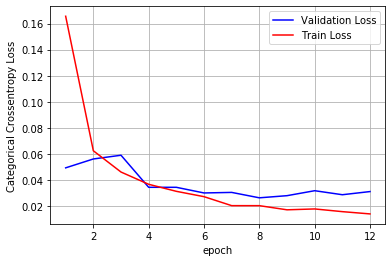

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
# 2 ConvNet layers of kernel size (3,3) with adam optimizer with BN with strides = (1,1) and additional 256 dense layer

from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 313s 5ms/step - loss: 0.2469 - acc: 0.9249 - val_loss: 0.0574 - val_acc: 0.9816
Epoch 2/12
60000/60000 [==============================] - 304s 5ms/step - loss: 0.0811 - acc: 0.9762 - val_loss: 0.0498 - val_acc: 0.9840
Epoch 3/12
60000/60000 [==============================] - 291s 5ms/step - loss: 0.0581 - acc: 0.9823 - val_loss: 0.0384 - val_acc: 0.9879
Epoch 4/12
60000/60000 [==============================] - 289s 5ms/step - loss: 0.0479 - acc: 0.9861 - val_loss: 0.0321 - val_acc: 0.9908
Epoch 5/12
60000/60000 [==============================] - 290s 5ms/step - loss: 0.0394 - acc: 0.9882 - val_loss: 0.0286 - val_acc: 0.9906
Epoch 6/12
60000/60000 [===========

Test loss: 0.042936010688127135
Test accuracy: 0.9894


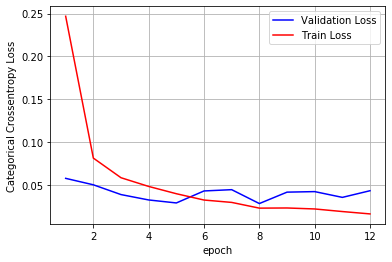

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
# 2 ConvNet layers of kernel size (3,3) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer

from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 176s 3ms/step - loss: 0.2580 - acc: 0.9222 - val_loss: 0.0693 - val_acc: 0.9785
Epoch 2/12
60000/60000 [==============================] - 173s 3ms/step - loss: 0.0870 - acc: 0.9741 - val_loss: 0.0385 - val_acc: 0.9880
Epoch 3/12
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0666 - acc: 0.9802 - val_loss: 0.0460 - val_acc: 0.9861
Epoch 4/12
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0543 - acc: 0.9828 - val_loss: 0.0354 - val_acc: 0.9894
Epoch 5/12
60000/60000 [==============================] - 174s 3ms/step - loss: 0.0447 - acc: 0.9862 - val_loss: 0.0291 - val_acc: 0.9905
Epoch 6/12
60000/60000 [==============================] - 174s 3ms/step - loss: 0.0371 - acc: 0.9884 - val_loss: 0.0309 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 175s 3ms/step - loss: 0.0336 - acc: 0.9895 - val_loss: 0.0316 - 

Test loss: 0.03103352297358324
Test accuracy: 0.991


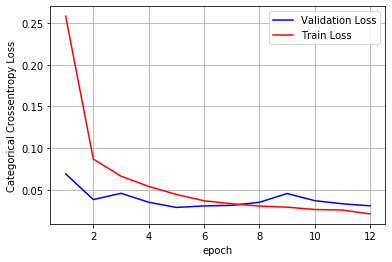

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
# 3 ConvNet layers of kernel size (3,3) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer

from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 495s 8ms/step - loss: 0.2389 - acc: 0.9280 - val_loss: 0.0534 - val_acc: 0.9833
Epoch 2/12
60000/60000 [==============================] - 499s 8ms/step - loss: 0.0767 - acc: 0.9774 - val_loss: 0.0475 - val_acc: 0.9847
Epoch 3/12
60000/60000 [==============================] - 488s 8ms/step - loss: 0.0572 - acc: 0.9826 - val_loss: 0.0432 - val_acc: 0.9873
Epoch 4/12
60000/60000 [==============================] - 488s 8ms/step - loss: 0.0492 - acc: 0.9853 - val_loss: 0.0244 - val_acc: 0.9929
Epoch 5/12
60000/60000 [==============================] - 487s 8ms/step - loss: 0.0398 - acc: 0.9882 - val_loss: 0.0272 - val_acc: 0.9914
Epoch 6/12
60000/60000 [==============================] - 488s 8ms/step - loss: 0.0350 - acc: 0.9889 - val_loss: 0.0246 - val_acc: 0.9919
Epoch 7/12
60000/60000 [==============================] - 487s 8ms/step - loss: 0.0295 - acc: 0.9910 - val_loss: 0.0238 - 

Test loss: 0.03090731922862178
Test accuracy: 0.9925


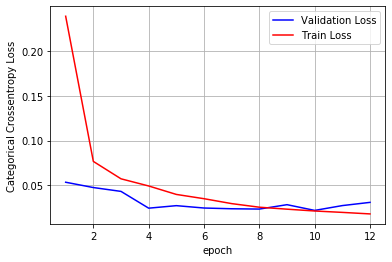

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [4]:
# 3 ConvNet layers of kernel size (5,5) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer

# reduce no. of epochs
epochs = 8

from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (5, 5), activation='relu'))

model.add(Conv2D(128, (5, 5), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 739s 12ms/step - loss: 0.2311 - acc: 0.9309 - val_loss: 0.0416 - val_acc: 0.9873
Epoch 2/8
60000/60000 [==============================] - 732s 12ms/step - loss: 0.0689 - acc: 0.9797 - val_loss: 0.0310 - val_acc: 0.9906
Epoch 3/8
60000/60000 [==============================] - 737s 12ms/step - loss: 0.0539 - acc: 0.9841 - val_loss: 0.0409 - val_acc: 0.9875
Epoch 4/8
60000/60000 [==============================] - 728s 12ms/step - loss: 0.0422 - acc: 0.9873 - val_loss: 0.0327 - val_acc: 0.9884
Epoch 5/8
60000/60000 [==============================] - 728s 12ms/step - loss: 0.0373 - acc: 0.9893 - val_loss: 0.0312 - val_acc: 0.9903
Epoch 6/8
60000/60000 [============

Test loss: 0.0196711675114595
Test accuracy: 0.9944


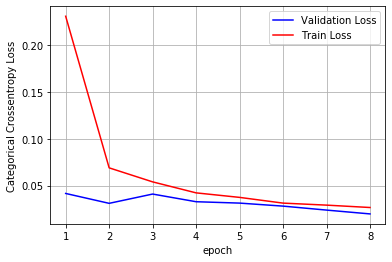

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [51]:
# 3 ConvNet layers of kernel size (7,7) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer

# reduce no. of epochs
epochs = 12

from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (5, 5), activation='relu'))

model.add(Conv2D(128, (5, 5), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 15s 242us/step - loss: 0.2208 - acc: 0.9338 - val_loss: 0.0694 - val_acc: 0.9786
Epoch 2/12
60000/60000 [==============================] - 9s 152us/step - loss: 0.0685 - acc: 0.9798 - val_loss: 0.0356 - val_acc: 0.9889
Epoch 3/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.0517 - acc: 0.9846 - val_loss: 0.0400 - val_acc: 0.9881
Epoch 4/12
60000/60000 [==============================] - 9s 153us/step - loss: 0.0439 - acc: 0.9870 - val_loss: 0.0283 - val_acc: 0.9913
Epoch 5/12
60000/60000 [==============================] - 9s 153us/step - loss: 0.0351 - acc: 0.9891 - val_loss: 0.0248 - val_acc: 0.9923
Epoch 6/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.0302 - acc: 0.9912 - val_loss: 0.0314 - val_acc: 0.9910
Epoch 7/12
60000/60000 [==============================] - 9s 155us/step - loss: 0.0291 - acc: 0.9911 - val_loss: 0.0227 

Test loss: 0.019098179739220858
Test accuracy: 0.9942


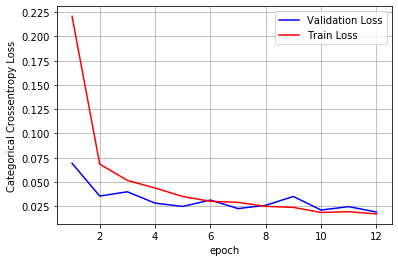

In [52]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [8]:
# 5 ConvNet layers of kernel size (5,5) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer

# reduce no. of epochs
epochs = 2

from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (5, 5), activation='relu'))

model.add(Conv2D(128, (5, 5), activation='relu'))

model.add(Conv2D(256, (5, 5), activation='relu'))

model.add(Conv2D(512, (5, 5), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3517s 59ms/step - loss: 0.5656 - acc: 0.8249 - val_loss: 0.3798 - val_acc: 0.8786
Epoch 2/2
60000/60000 [==============================] - 3617s 60ms/step - loss: 0.1398 - acc: 0.9589 - val_loss: 0.0892 - val_acc: 0.9706


Test loss: 0.08924943232676014
Test accuracy: 0.9706


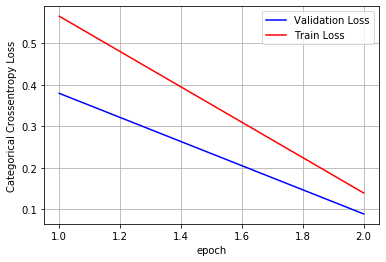

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [8]:
# 5 ConvNet layers of kernel size (5,5) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer in reverse order

# reduce epochs
epochs = 5

from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(512, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(256, (5, 5), activation='relu'))

model.add(Conv2D(128, (5, 5), activation='relu'))

model.add(Conv2D(64, (5, 5), activation='relu'))

model.add(Conv2D(32, (5, 5), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 48s 798us/step - loss: 0.5458 - acc: 0.8326 - val_loss: 0.0882 - val_acc: 0.9726
Epoch 2/5
60000/60000 [==============================] - 46s 761us/step - loss: 0.1176 - acc: 0.9668 - val_loss: 0.0967 - val_acc: 0.9698
Epoch 3/5
60000/60000 [==============================] - 46s 763us/step - loss: 0.0764 - acc: 0.9782 - val_loss: 0.0776 - val_acc: 0.9774
Epoch 4/5
60000/60000 [==============================] - 46s 760us/step - loss: 0.0622 - acc: 0.9824 - val_loss: 0.0319 - val_acc: 0.9904
Epoch 5/5
60000/60000 [==============================] - 46s 760us/step - loss: 0.0550 - acc: 0.9842 - val_loss: 0.0280 - val_acc: 0.9916


Test loss: 0.027952007718160168
Test accuracy: 0.9916


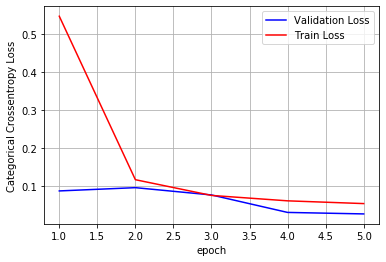

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [25]:
# 4 ConvNet layers of kernel size (7,7) + 1 ConvNet layers of kernel size (3, 3) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer

# reduce epochs
epochs = 5

from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (7, 7), activation='relu'))

model.add(Conv2D(128, (7, 7), activation='relu'))

model.add(Conv2D(256, (7, 7), activation='relu'))

model.add(Conv2D(512, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 258us/step - loss: 0.1921 - acc: 0.9434 - val_loss: 0.3286 - val_acc: 0.9046
Epoch 2/5
60000/60000 [==============================] - 12s 196us/step - loss: 0.0642 - acc: 0.9815 - val_loss: 0.0816 - val_acc: 0.9754
Epoch 3/5
60000/60000 [==============================] - 12s 195us/step - loss: 0.0443 - acc: 0.9873 - val_loss: 0.0387 - val_acc: 0.9886
Epoch 4/5
60000/60000 [==============================] - 12s 194us/step - loss: 0.0368 - acc: 0.9893 - val_loss: 0.0335 - val_acc: 0.9905
Epoch 5/5
60000/60000 [==============================] - 12s 193us/step - loss: 0.0336 - acc: 0.9904 - val_loss: 0.0313 - val_acc: 0.9904


Test loss: 0.031292892064945774
Test accuracy: 0.9904


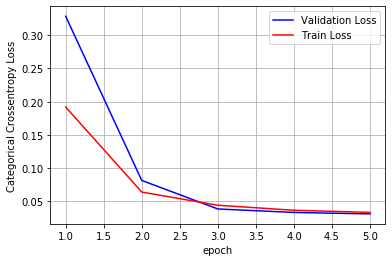

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [27]:
# 4 ConvNet layers of kernel size (7,7) + 1 ConvNet layers of kernel size (3, 3) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer in filter higher to lower

# reduce epochs
epochs = 5

from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(512, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(256, (7, 7), activation='relu'))

model.add(Conv2D(128, (7, 7), activation='relu'))

model.add(Conv2D(64, (7, 7), activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 66s 1ms/step - loss: 0.7512 - acc: 0.7668 - val_loss: 0.1180 - val_acc: 0.9667
Epoch 2/5
60000/60000 [==============================] - 60s 1ms/step - loss: 0.1382 - acc: 0.9606 - val_loss: 0.0578 - val_acc: 0.9837
Epoch 3/5
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0881 - acc: 0.9756 - val_loss: 0.0418 - val_acc: 0.9889
Epoch 4/5
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0687 - acc: 0.9818 - val_loss: 0.0403 - val_acc: 0.9899
Epoch 5/5
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0572 - acc: 0.9853 - val_loss: 0.0356 - val_acc: 0.9907


Test loss: 0.035559197256021434
Test accuracy: 0.9907


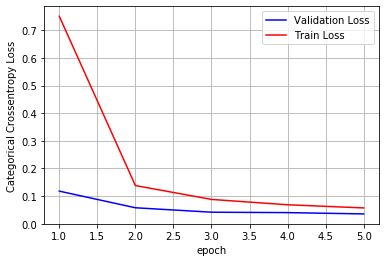

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [29]:
# 7 ConvNet layers of kernel size (3, 3) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer

# reduce epochs
epochs = 5

from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(Conv2D(256, (3, 3), activation='relu'))

model.add(Conv2D(512, (3, 3), activation='relu'))

model.add(Conv2D(1024, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 78s 1ms/step - loss: 0.2416 - acc: 0.9286 - val_loss: 0.0798 - val_acc: 0.9772
Epoch 2/5
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0817 - acc: 0.9762 - val_loss: 0.0349 - val_acc: 0.9897
Epoch 3/5
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0631 - acc: 0.9816 - val_loss: 0.1273 - val_acc: 0.9625
Epoch 4/5
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0491 - acc: 0.9852 - val_loss: 0.0624 - val_acc: 0.9813
Epoch 5/5
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0450 - acc: 0.9873 - val_loss: 0.0300 - val_acc: 0.9915


Test loss: 0.029997077703708783
Test accuracy: 0.9915


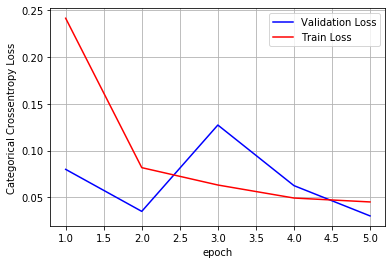

In [30]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [32]:
# 6 ConvNet layers of kernel size (5, 5) + 1 ConvNet layers of kernel size (3, 3) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer

# reduce epochs
epochs = 5

from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(32, (5, 5), activation='relu'))

model.add(Conv2D(64, (5, 5), activation='relu'))

model.add(Conv2D(128, (5, 5), activation='relu'))

model.add(Conv2D(256, (5, 5), activation='relu'))

model.add(Conv2D(512, (5, 5), activation='relu'))

model.add(Conv2D(1024, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 32s 527us/step - loss: 0.4578 - acc: 0.8591 - val_loss: 0.1843 - val_acc: 0.9418
Epoch 2/5
60000/60000 [==============================] - 24s 401us/step - loss: 0.0954 - acc: 0.9728 - val_loss: 0.0526 - val_acc: 0.9834
Epoch 3/5
60000/60000 [==============================] - 24s 394us/step - loss: 0.0733 - acc: 0.9799 - val_loss: 0.1200 - val_acc: 0.9661
Epoch 4/5
60000/60000 [==============================] - 23s 389us/step - loss: 0.0567 - acc: 0.9840 - val_loss: 0.0595 - val_acc: 0.9856
Epoch 5/5
60000/60000 [==============================] - 23s 386us/step - loss: 0.0492 - acc: 0.9860 - val_loss: 0.0611 - val_acc: 0.9842


Test loss: 0.06113202596517513
Test accuracy: 0.9842


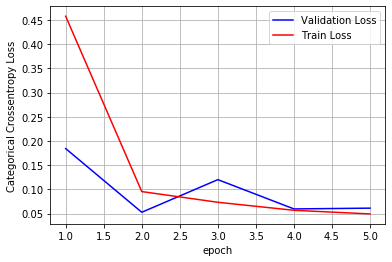

In [33]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [43]:
# 7 ConvNet layers of kernel size (7, 7) + (5, 5) + (3, 3) + (1, 1) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer

# reduce epochs
epochs = 5

from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(16, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(32, (7, 7), activation='relu'))

model.add(Conv2D(64, (7, 7), activation='relu'))

model.add(Conv2D(128, (5, 5), activation='relu'))

model.add(Conv2D(256, (3, 3), activation='relu'))

model.add(Conv2D(512, (3, 3), activation='relu'))

model.add(Conv2D(1024, (1, 1), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 238us/step - loss: 0.4217 - acc: 0.8753 - val_loss: 0.1831 - val_acc: 0.9484
Epoch 2/5
60000/60000 [==============================] - 9s 157us/step - loss: 0.1084 - acc: 0.9698 - val_loss: 0.0549 - val_acc: 0.9857
Epoch 3/5
60000/60000 [==============================] - 9s 158us/step - loss: 0.0760 - acc: 0.9798 - val_loss: 0.0864 - val_acc: 0.9759
Epoch 4/5
60000/60000 [==============================] - 9s 158us/step - loss: 0.0638 - acc: 0.9829 - val_loss: 0.0489 - val_acc: 0.9859
Epoch 5/5
60000/60000 [==============================] - 9s 156us/step - loss: 0.0554 - acc: 0.9854 - val_loss: 0.0641 - val_acc: 0.9825


Test loss: 0.0641055674814852
Test accuracy: 0.9825


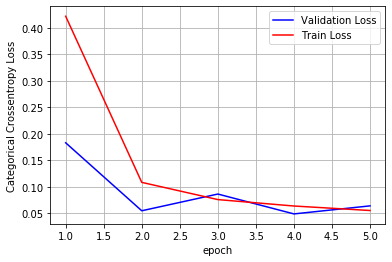

In [44]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [49]:
# 7 ConvNet layers of kernel size (7, 7) + (5, 5) + (3, 3) + (1, 1) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer in filter reverse order

# reduce epochs
epochs = 5

from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(1024, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(512, (7, 7), activation='relu'))

model.add(Conv2D(256, (7, 7), activation='relu'))

model.add(Conv2D(128, (5, 5), activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(Conv2D(16, (1, 1), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 353s 6ms/step - loss: 1.2800 - acc: 0.5857 - val_loss: 3.4473 - val_acc: 0.2100
Epoch 2/5
60000/60000 [==============================] - 328s 5ms/step - loss: 0.2642 - acc: 0.9196 - val_loss: 0.1766 - val_acc: 0.9495
Epoch 3/5
60000/60000 [==============================] - 326s 5ms/step - loss: 0.1621 - acc: 0.9523 - val_loss: 0.1216 - val_acc: 0.9635
Epoch 4/5
60000/60000 [==============================] - 325s 5ms/step - loss: 0.1267 - acc: 0.9646 - val_loss: 0.1049 - val_acc: 0.9697
Epoch 5/5
60000/60000 [==============================] - 324s 5ms/step - loss: 0.1008 - acc: 0.9712 - val_loss: 0.0737 - val_acc: 0.9800


Test loss: 0.07367353378676343
Test accuracy: 0.98


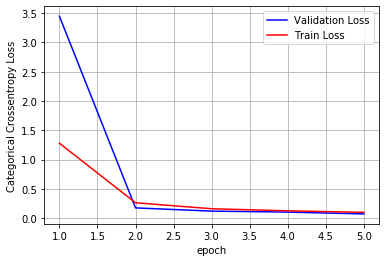

In [50]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [55]:
# Please compare all your models using Prettytable library
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

# I tried following CNN architectures:

# 2 ConvNet layers of kernel size (3,3) with AdaDelta optimizer without BN (2ConvNet+kernel-size(3,3)+AdaDelta)
# 2 ConvNet layers of kernel size (3,3) with adam optimizer without BN (2ConvNet+kernel-size(3,3)+Adam)
# 2 ConvNet layers of kernel size (3,3) with AdaDelta optimizer with BN (2ConvNet+kernel-size(3,3)+AdaDelta+BN)
# 2 ConvNet layers of kernel size (3,3) with adam optimizer with BN (2ConvNet+kernel-size(3,3)+Adam+BN)
# 2 ConvNet layers of kernel size (3,3) with adam optimizer with BN with strides = (2,2) (2ConvNet+kernel-size(3,3)+Adam+BN+strides(2,2))
# 2 ConvNet layers of kernel size (3,3) with adam optimizer with BN with strides = (1,1) and additional 256 dense layer 
# (2ConvNet+kernel-size(3,3)+Adam+BN+strides(1,1)+additional dense 256)
# 2 ConvNet layers of kernel size (3,3) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer
# (2ConvNet+kernel-size(3,3)+Adam+BN+strides(2,2)+additional dense 256)

# 3 ConvNet layers of kernel size (3,3) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer
# (3ConvNet+kernel-size(3,3)+Adam+BN+strides(2,2)+additional dense 256)
# 3 ConvNet layers of kernel size (5,5) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer
# (3ConvNet+kernel-size(5,5)+Adam+BN+strides(2,2)+additional dense 256)
# 3 ConvNet layers of kernel size (7,7) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer
# (3ConvNet+kernel-size(7,7)+Adam+BN+strides(2,2)+additional dense 256)

# 5 ConvNet layers of kernel size (5,5) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer
# (5ConvNet+kernel-size(5,5)+Adam+BN+strides(2,2)+additional dense 256)
# 5 ConvNet layers of kernel size (5,5) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer in reverse order
# (5ConvNet+kernel-size(5,5)+Adam+BN+strides(2,2)+additional dense 256)
# 5 ConvNet layers of kernel size (7,7) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer
# (5ConvNet+kernel-size(7,7)+Adam+BN+strides(2,2)+additional dense 256)
# 5 ConvNet layers of kernel size (7,7) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer in reverse order
# (5ConvNet+kernel-size(7,7)+Adam+BN+strides(2,2)+additional dense 256+filter reverse)

# 7 ConvNet layers of kernel size (3, 3) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer
# (7ConvNet+kernel-size(3,3)+Adam+BN+strides(2,2)+additional dense 256)
# 7 ConvNet layers of kernel size (5, 5) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer
# (7ConvNet+kernel-size(5,5)+Adam+BN+strides(2,2)+additional dense 256)
# 7 ConvNet layers of kernel size (7, 7) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer
# (7ConvNet+kernel-size(7,7)+Adam+BN+strides(2,2)+additional dense 256)
# 7 ConvNet layers of kernel size (7, 7) with adam optimizer with BN with strides = (2,2) and additional 256 dense layer in reverse order
# (7ConvNet+kernel-size(7,7)+Adam+BN+strides(2,2)+additional dense 256+filter reverse)
    
x = PrettyTable()
x.field_names = ["Model", "Epoch", "Test Loss", "Accuracy"]
x.add_row(["2ConvNet+kernel-size(3,3)+AdaDelta", 12, 0.02989680919691109, 0.9917])
x.add_row(["2ConvNet+kernel-size(3,3)+Adam", 12, 0.0264959564788458, 0.9916])
x.add_row(["2ConvNet+kernel-size(3,3)+AdaDelta+BN", 12, 0.03097261716249959, 0.9916])
x.add_row(["2ConvNet+kernel-size(3,3)+Adam+BN", 12, 0.03166750481659692, 0.9915])
x.add_row(["2ConvNet+kernel-size(3,3)+Adam+BN+strides(2,2)", 12, 0.031174442245866886, 0.9915])
x.add_row(["2ConvNet+kernel-size(3,3)+Adam+BN+strides(1,1)+additional dense 256", 12, 0.042936010688127135, 0.9894])
x.add_row(["2ConvNet+kernel-size(3,3)+Adam+BN+strides(2,2)+additional dense 256", 12, 0.03103352297358324, 0.991])

x.add_row(["3ConvNet+kernel-size(3,3)+Adam+BN+strides(2,2)+additional dense 256", 12, 0.03090731922862178, 0.9925])
x.add_row(["3ConvNet+kernel-size(5,5)+Adam+BN+strides(2,2)+additional dense 256", 8, 0.0196711675114595, 0.9944])
x.add_row(["3ConvNet+kernel-size(7,7)+Adam+BN+strides(2,2)+additional dense 256", 12, 0.019098179739220858, 0.9942])

x.add_row(["5ConvNet+kernel-size(5,5)+Adam+BN+strides(2,2)+additional dense 256", 2, 0.08924943232676014, 0.9706])
x.add_row(["5ConvNet+kernel-size(5,5)+Adam+BN+strides(2,2)+additional dense 256 + filter reverse", 5, 0.027952007718160168, 0.9916])
x.add_row(["5ConvNet+kernel-size(7,7)+Adam+BN+strides(2,2)+additional dense 256", 5, 0.031292892064945774, 0.9904])
x.add_row(["5ConvNet+kernel-size(7,7)+Adam+BN+strides(2,2)+additional dense 256 + filter reverse", 5, 0.035559197256021434, 0.9907])

x.add_row(["7ConvNet+kernel-size(3,3)+Adam+BN+strides(2,2)+additional dense 256", 5, 0.029997077703708783, 0.9915])
x.add_row(["7ConvNet+kernel-size(5,5)+Adam+BN+strides(2,2)+additional dense 256", 5, 0.06113202596517513, 0.9842])
x.add_row(["7ConvNet+kernel-size(7,7)+Adam+BN+strides(2,2)+additional dense 256", 5, 0.0641055674814852, 0.9825])
x.add_row(["7ConvNet+kernel-size(7,7)+Adam+BN+strides(2,2)+additional dense 256 + filter reverse", 5, 0.07367353378676343, 0.98])

print(x)

+--------------------------------------------------------------------------------------+-------+----------------------+----------+
|                                        Model                                         | Epoch |      Test Loss       | Accuracy |
+--------------------------------------------------------------------------------------+-------+----------------------+----------+
|                          2ConvNet+kernel-size(3,3)+AdaDelta                          |   12  | 0.02989680919691109  |  0.9917  |
|                            2ConvNet+kernel-size(3,3)+Adam                            |   12  |  0.0264959564788458  |  0.9916  |
|                        2ConvNet+kernel-size(3,3)+AdaDelta+BN                         |   12  | 0.03097261716249959  |  0.9916  |
|                          2ConvNet+kernel-size(3,3)+Adam+BN                           |   12  | 0.03166750481659692  |  0.9915  |
|                    2ConvNet+kernel-size(3,3)+Adam+BN+strides(2,2)                



<h1>Conclusion:</h1>

*   MNIST is very simple dataset so increasing complexity in NN doesn't give better performance.

*  Adding additional dense layer increase performance

* Filter size in Conv layer from higher to lower has better performance i.e. 1024->512->256 is better than 256->512->1024

* **For MNIST data using 3 Conv NN with 7X7 or 5X5 kernel size gives us best performance, Test loss is 0.019 and accuracy is 99.44%** 

* Epochs are increasing performance with 2 epochs I am getting 97% accuracy only

* **GPUs are much faster than CPU, For current notebook for some complex NN architecture CPU shows approx 1-2hrs for 1 Epoch while GPU only took 6-7mins to execute that task.**



